<a href="https://colab.research.google.com/github/satvikGarre/fraud-detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip dataset.zip
%ls

Archive:  dataset.zip
   creating: data/
  inflating: data/2018-04-01.pkl     
  inflating: data/2018-04-02.pkl     
  inflating: data/2018-04-03.pkl     
  inflating: data/2018-04-04.pkl     
  inflating: data/2018-04-05.pkl     
  inflating: data/2018-04-06.pkl     
  inflating: data/2018-04-07.pkl     
  inflating: data/2018-04-08.pkl     
  inflating: data/2018-04-09.pkl     
  inflating: data/2018-04-10.pkl     
  inflating: data/2018-04-11.pkl     
  inflating: data/2018-04-12.pkl     
  inflating: data/2018-04-13.pkl     
  inflating: data/2018-04-14.pkl     
  inflating: data/2018-04-15.pkl     
  inflating: data/2018-04-16.pkl     
  inflating: data/2018-04-17.pkl     
  inflating: data/2018-04-18.pkl     
  inflating: data/2018-04-19.pkl     
  inflating: data/2018-04-20.pkl     
  inflating: data/2018-04-21.pkl     
  inflating: data/2018-04-22.pkl     
  inflating: data/2018-04-23.pkl     
  inflating: data/2018-04-24.pkl     
  inflating: data/2018-04-25.pkl     
  inflati

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import os
files_in_data = os.listdir('data')
pickle_file = files_in_data[0]
pickle_file_path = os.path.join('data', pickle_file)
data = pd.read_pickle(pickle_file_path)

In [ ]:
data.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
949771,949771,2018-07-09 00:00:22,147,7898,64.83,8553622,99,0,0
949772,949772,2018-07-09 00:01:33,1181,312,36.83,8553693,99,0,0
949773,949773,2018-07-09 00:02:29,3831,570,99.65,8553749,99,0,0
949774,949774,2018-07-09 00:03:09,4258,436,93.82,8553789,99,0,0
949775,949775,2018-07-09 00:03:11,314,6605,95.26,8553791,99,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
data['TX_DATETIME'] = pd.to_datetime(data['TX_DATETIME'])
data['TX_DAY'] = data['TX_DATETIME'].dt.day
data['TX_HOUR'] = data['TX_DATETIME'].dt.hour
data['TX_MONTH'] = data['TX_DATETIME'].dt.month
features = ['TX_AMOUNT', 'TX_DAY', 'TX_HOUR', 'TX_MONTH', 'TX_TIME_DAYS', 'TX_TIME_SECONDS']
X = data[features]
y = data['TX_FRAUD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(accuracy)
print(conf_matrix)
print(class_report)
print(roc_auc)


0.992600422832981
[[1874    0]
 [  14    4]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1874
           1       1.00      0.22      0.36        18

    accuracy                           0.99      1892
   macro avg       1.00      0.61      0.68      1892
weighted avg       0.99      0.99      0.99      1892

0.5538361200047432


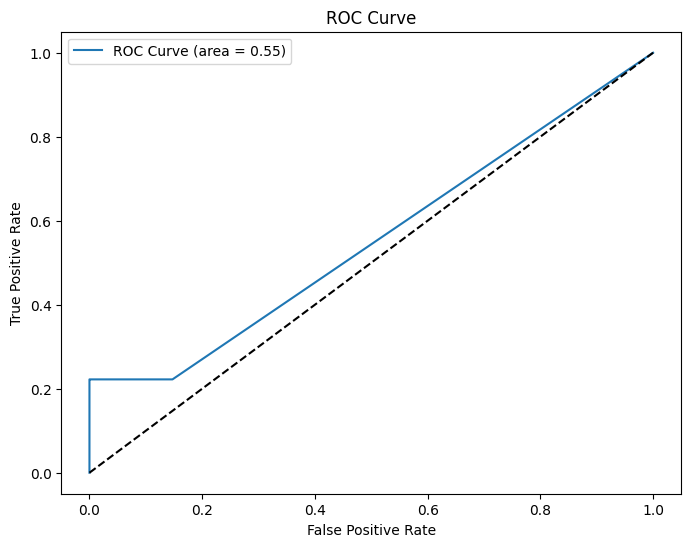

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()